In [1]:
# Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

np.random.seed(42)

In [2]:
# Import data

dftrain = pd.read_csv("P:\Work in Progress\Mike Taylor\python\cs229\problem-sets\PS1\data\ds3_train.csv")
dftest = pd.read_csv("P:\Work in Progress\Mike Taylor\python\cs229\problem-sets\PS1\data\ds3_test.csv")
# dfvalid = pd.read_csv("P:\Work in Progress\Mike Taylor\python\cs229\problem-sets\PS1\data\ds1_valid.csv")

In [3]:
dftrain[dftrain.y==0].head(5)

,t,x_1,x_2,y
0,0.0,-1.548319,-2.762987,0
1,0.0,-3.958870,-0.612780,0
2,0.0,-2.276375,0.614934,0
3,0.0,0.556287,-3.931406,0
4,0.0,-1.491000,-2.159297,0


In [4]:
dftrain[dftrain.y==1].head(5)

,t,x_1,x_2,y
625,1.0,2.165669,4.016832,1
627,1.0,1.631504,2.522695,1
629,1.0,1.224912,1.905164,1
630,1.0,1.790309,3.496121,1
633,1.0,1.818536,0.754065,1


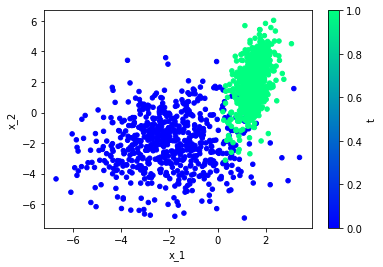

In [5]:
fig, ax = plt.subplots()
sc = dftrain.plot.scatter(x='x_1', y='x_2', c='t', colormap='winter', ax=ax)

<hr>
<b>Train the model on the "true" t labels</b>

In [6]:
y_train = dftrain["t"] # y
X_train = dftrain[["x_1","x_2"]]

y_test = dftest["t"] # y
X_test = dftest[["x_1","x_2"]]

y = pd.concat([y_train,y_test])
X = pd.concat([X_train,X_test])

In [7]:
log_clf = LogisticRegression(random_state=42)

for clf in (log_clf,): # , rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9838709677419355


In [8]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-8, 4, -8, 8], alpha=0.5, contour=True): # axes=[0, 8, 0, 8]
    X = X.to_numpy() # as_matrix() # added code to convert dataframe X to array X
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

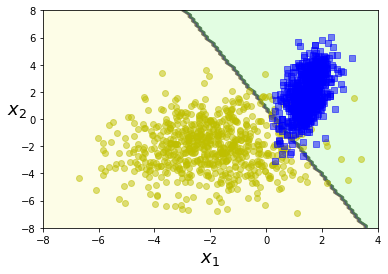

In [9]:
plot_decision_boundary(log_clf, X, y)

<hr>
<b>Train the model on the y labels (true "1" but missing some "1"'s and "0")</b>

In [12]:
y_train = dftrain["y"]
X_train = dftrain[["x_1","x_2"]]

y_test = dftest["y"]
X_test = dftest[["x_1","x_2"]]

y = pd.concat([y_train,y_test])
X = pd.concat([X_train,X_test])

In [13]:
log_clf = LogisticRegression(random_state=42)

for clf in (log_clf,): # , rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8870967741935484


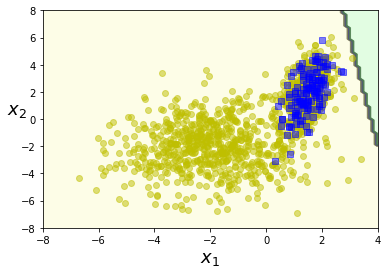

In [16]:
plot_decision_boundary(log_clf, X, y)